In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

columns_name = ['Class', 'Alcohol', 'Metalic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                'Proline ']

wine = pd.read_csv('wineData.txt', sep = ',', names = columns_name, encoding='ISO-8859-1')

wine

,Class,Alcohol,Metalic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


En este dataset sobre la composición de 3 tipos de vinos de la misma región de Italia, podemos encontrar una serie de características asociadas, con mayor o menor cantidad, a cada uno de los tipos de vino.

Por un lado, estas características hacen referencia a los componentes químicos que contienen ('Alcohol', 'Magnesium', 'Metalic Acid', etc...), aunque también hay otras que se refieren a su color ('Color Intensity', 'Hue').

A grandes rasgos, lo que intentaremos hacer en esta tarea es analizar el dataset, y mediante disintos modelos de clasificación y evaluación, obtener los mejores resultados posibles para clasificar la totalidad de los registros.

En primer lugar, obtenemos una descripción general del dataset al consultar su forma, la cantidad de clases, el tipo de los datos, si faltan valores en los registros o si existen duplicados.

In [2]:
wine.shape

(178, 14)

In [3]:
wine.Class.unique()

array([1, 2, 3], dtype=int64)

In [4]:
np.bincount(wine.Class)

array([ 0, 59, 71, 48], dtype=int64)

In [5]:
wine.dtypes

Class                             int64
Alcohol                         float64
Metalic acid                    float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [6]:
wine.isnull().sum()

Class                           0
Alcohol                         0
Metalic acid                    0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
wine.duplicated().sum()

0

In [8]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Metalic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Comprobamos que el dataset se encuentra ya en condiciones para poder empezar a trabajarlo, ya que no dispone de valores nulos ni duplicados y los tipos de datos son correctos.

Sin embargo, también tenemos que tener en cuenta que los tres tipos de vino no se encuentran representados en la misma proporción, por lo que en el caso de seleccionar una muestra aleatoria, habría peligro de que el vino de clase 2 esté sobrerepresentado y el de clase 3 infrarepresentado.

Por último, hay algunas variables como 'Proline' o 'Magnesium' que se encuentran a una escala bastante superior al resto, por lo que es posible que tengamos que aplicar algún tipo de normalización, escalación o estandarización al dataset.

Por el momento empezamos a explorarlo con un heatmap y así consultar la correlación de los datos entre ellos sin tener en cuenta todavía la relación que tienen con los tres tipos de clase de vino.

<Axes: >

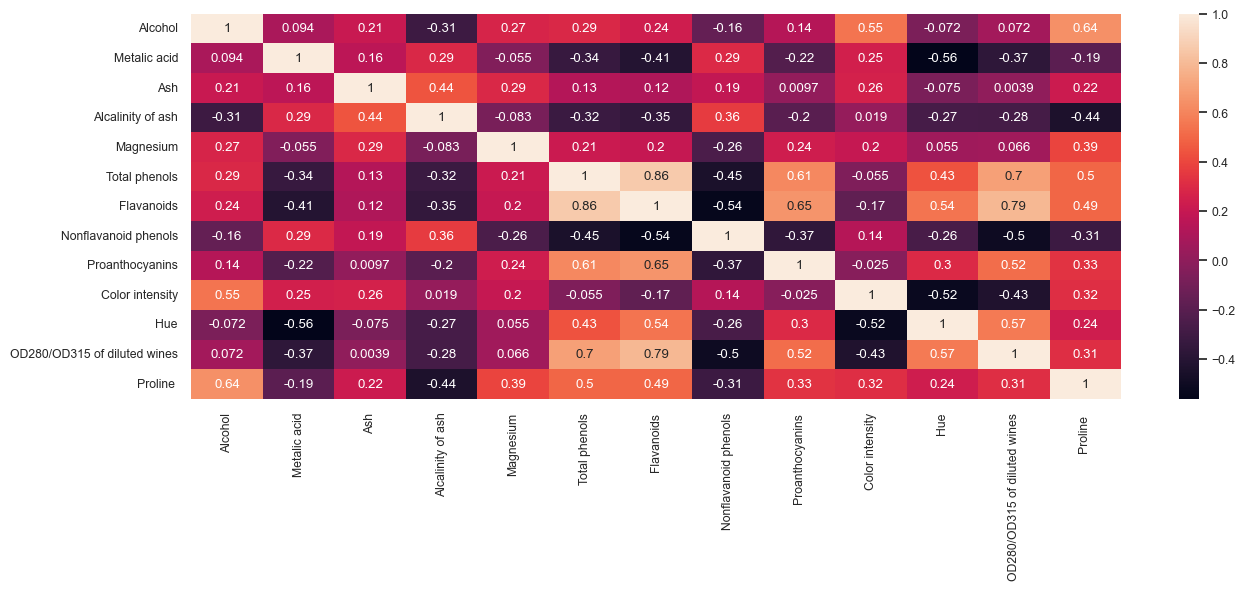

In [9]:
plt.figure(figsize=(15,5))
sns.set(font_scale=0.8)

sns.heatmap(wine.iloc[:, 1:].corr(), annot=True)

Saber la correlación entre los datos nos proporciona información sobre si hay variables muy similares, por lo que en caso de necesitar una reducción del dataset podrían ser eliminadas y así mejorar el rendimiento.

En este caso concreto, observamos que 'flavanoids' se correlaciona con 'total phenols' y con 'od280/od315_of_diluted_wines', por lo que podríamos empezar por aquí en caso de ser necesario.

Sin embargo, por ahora continuaremos y seguiremos haciéndonos una idea más exacta sobre cómo se relaciona cada variable con cada clase con un gráfico 'pairplot'.

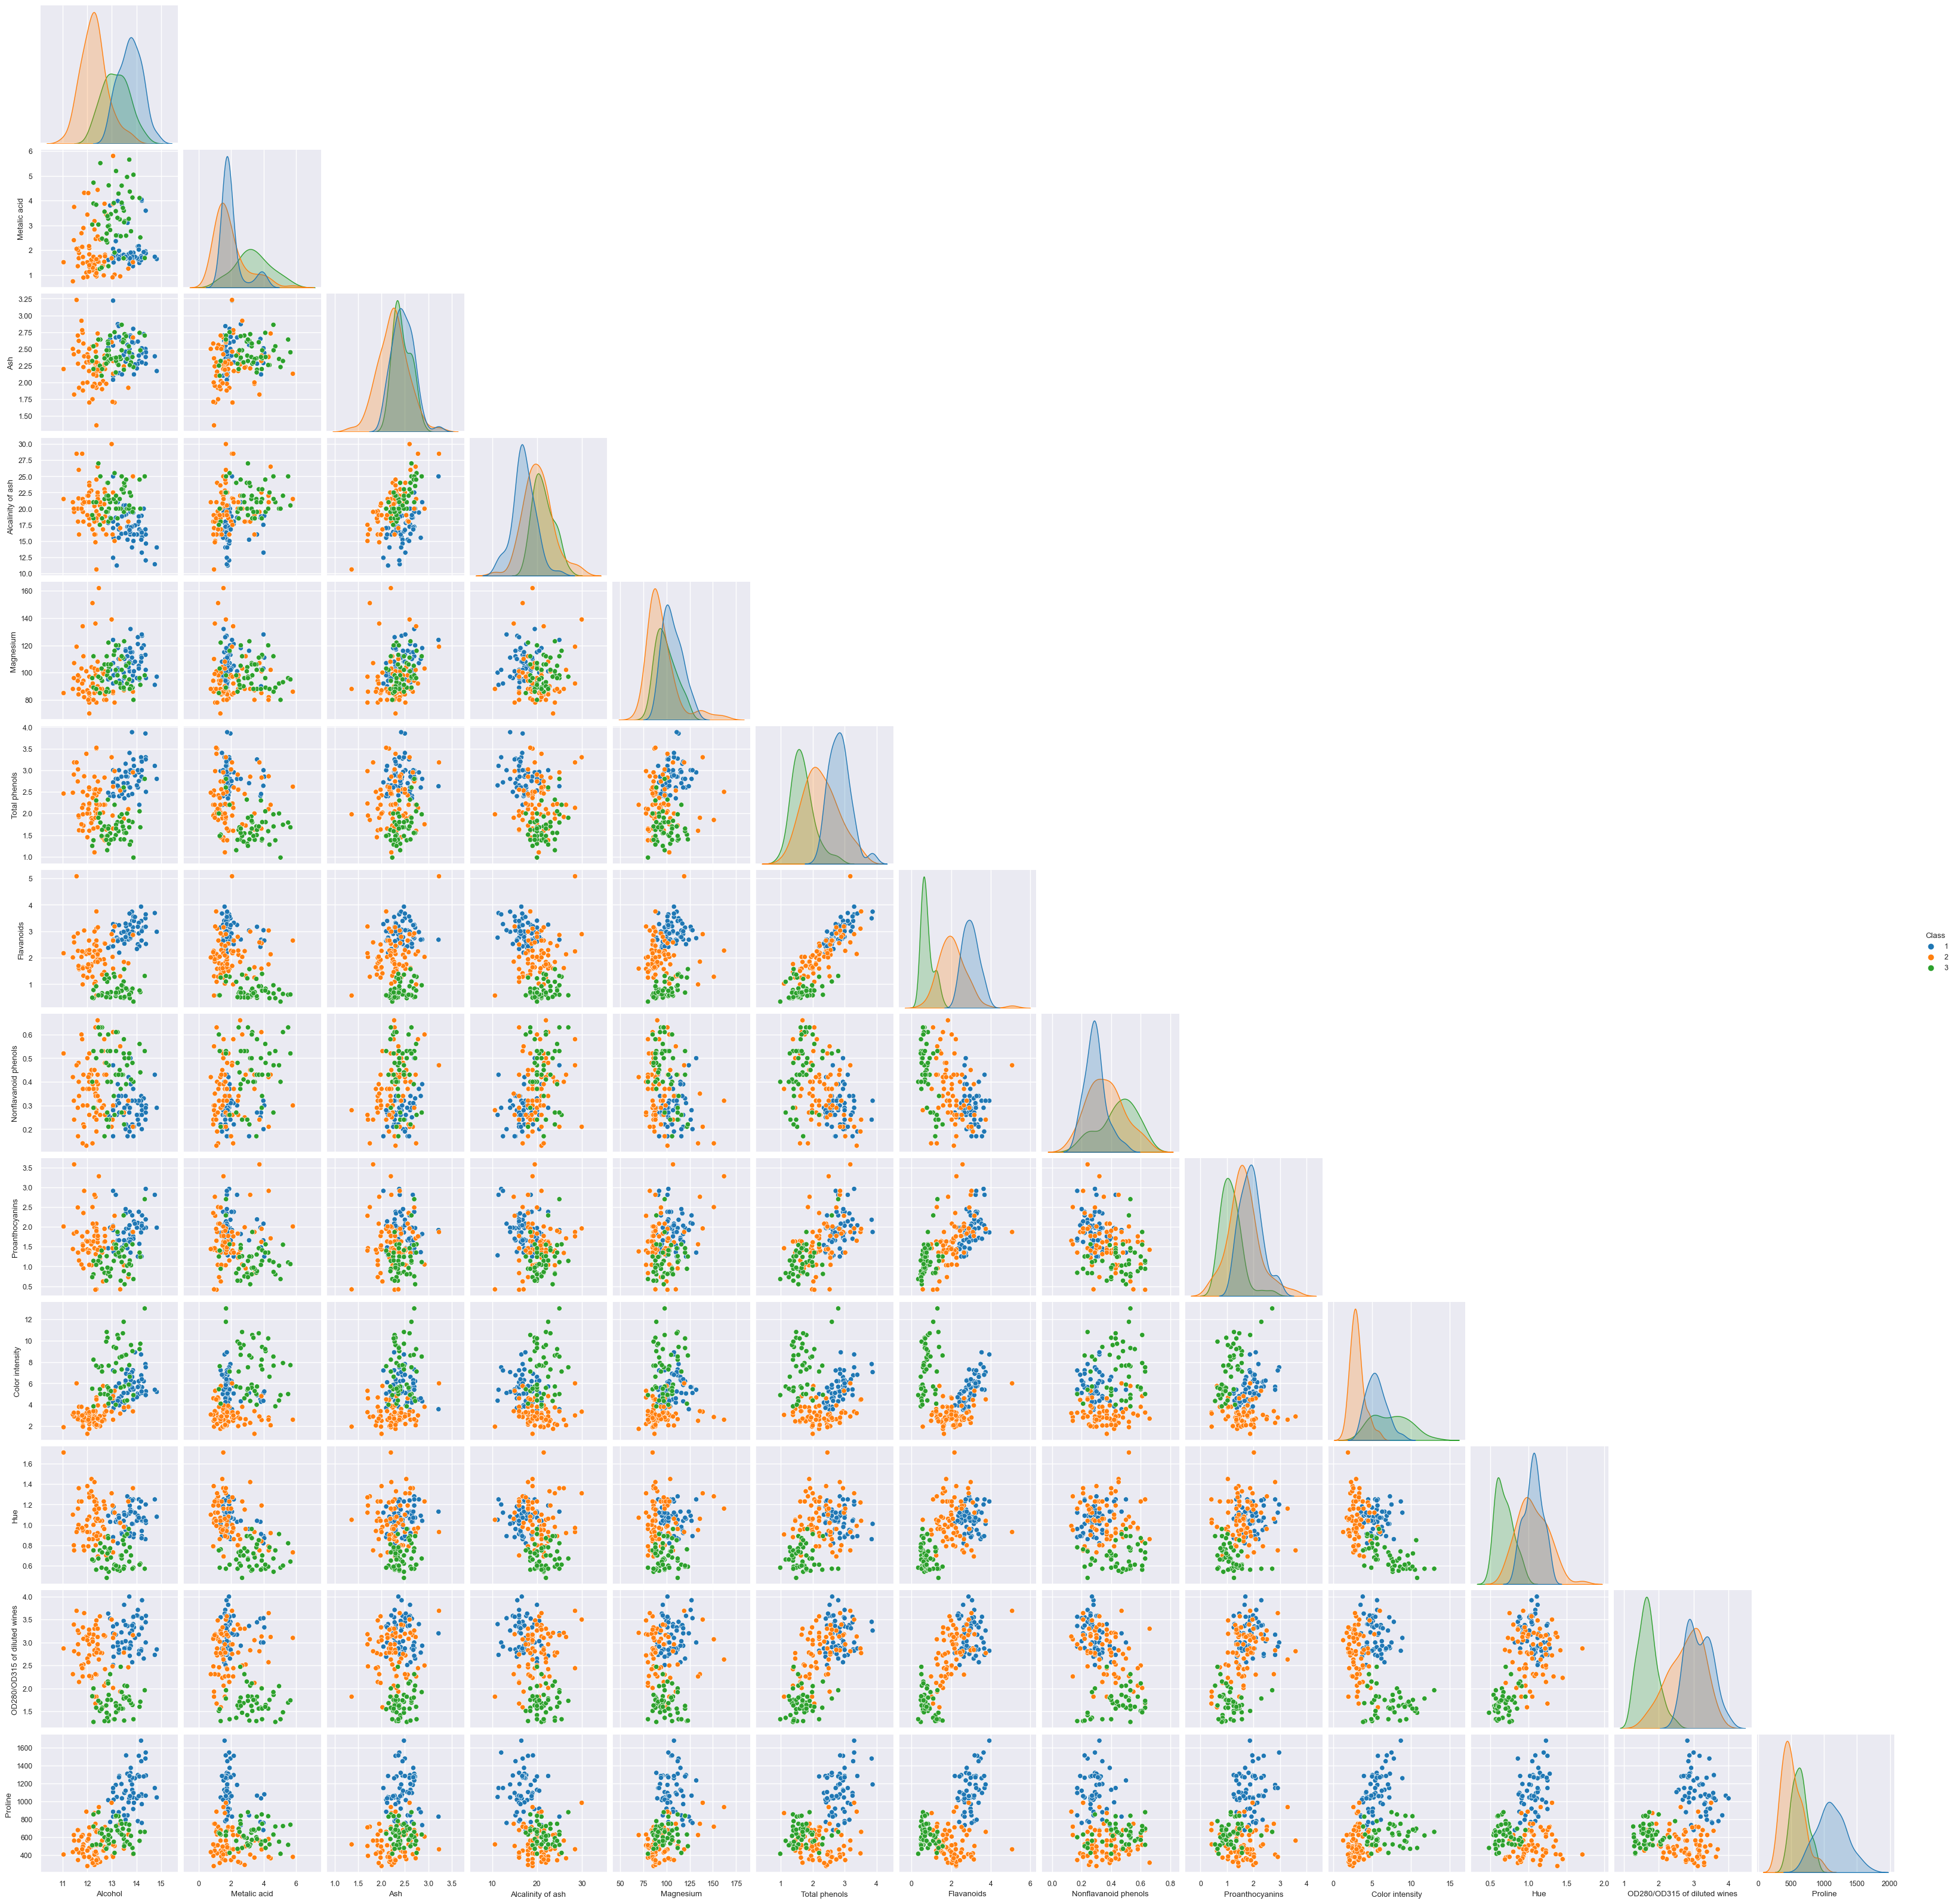

In [10]:
sns.set(font_scale=0.8)

sns.pairplot(wine, hue='Class', palette="tab10", corner=True)

plt.show()

Con este gráfico podemos apreciar en cambio qué variables se diferencian más de las otras, por lo que nos serviría para asociarla más con tan solo una clase. En este caso, las variables 'Proline', 'Color intensity' y 'Flavanoids' nos serían de mucha utilidad para clasificar respectivamente los vinos de clase 1, 2 y 3.

Consultamos ahora mediante un 'boxplot' si las diferentes variables disponen de outliers en función de la clase. Al mismo tiempo, este gráfico nos servirá para ver de manera más clara qué tanto se asocian algunas variables a cada una de las 3 clases de vino, por lo que reforzará lo que acabamos de ver en el gráfico 'pairplot'.

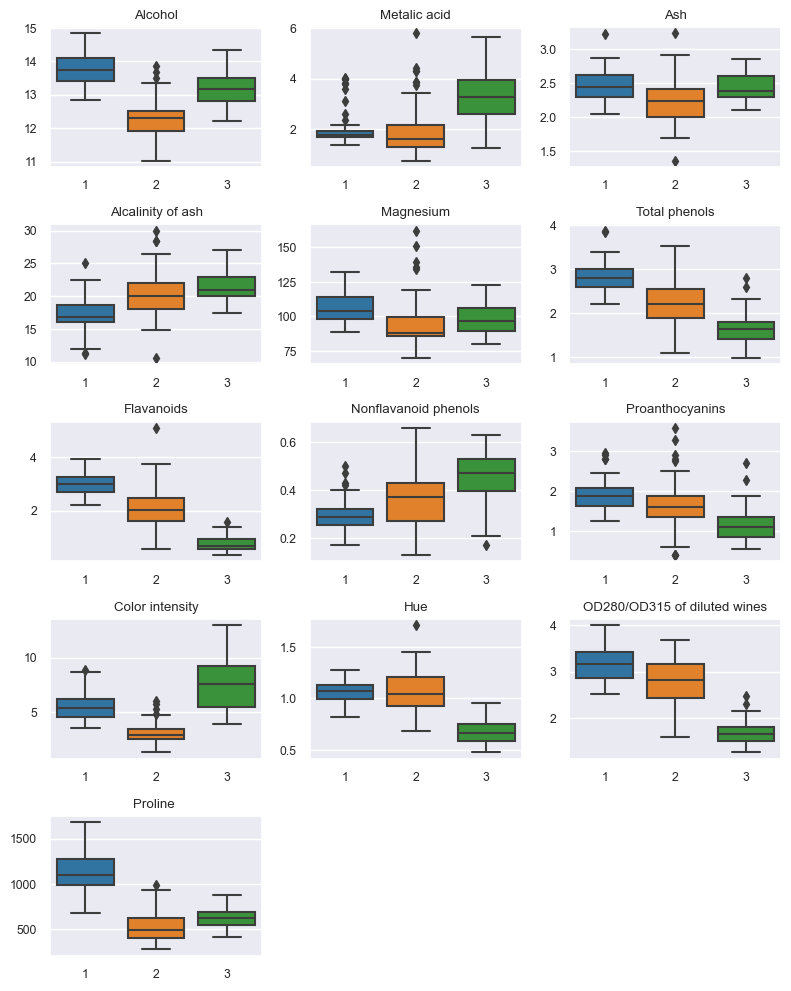

In [11]:
fig, axs = plt.subplots(5, 3, figsize=(8, 10))

for i, ax in enumerate(fig.get_axes()):
    if i < 13:
        feature = wine.columns[1:][i]
        sns.boxplot(wine, x='Class', y=feature, ax=ax, palette="tab10")
        ax.set_title(feature)
        ax.set_ylabel('')
        ax.set_xlabel('')
fig.delaxes(axs[(4, 2)])
fig.delaxes(axs[(4, 1)])
plt.tight_layout()
plt.show()

Vemos en el gráfico que además la mayoría de las variables disponen de outliers, por lo que en caso de necesitar transformar los datos, el 'Robust Scaler' nos puede ser de utlidad. Para acabar de confirmarlo, consultamos la distribución de los datos para ver si son normales.

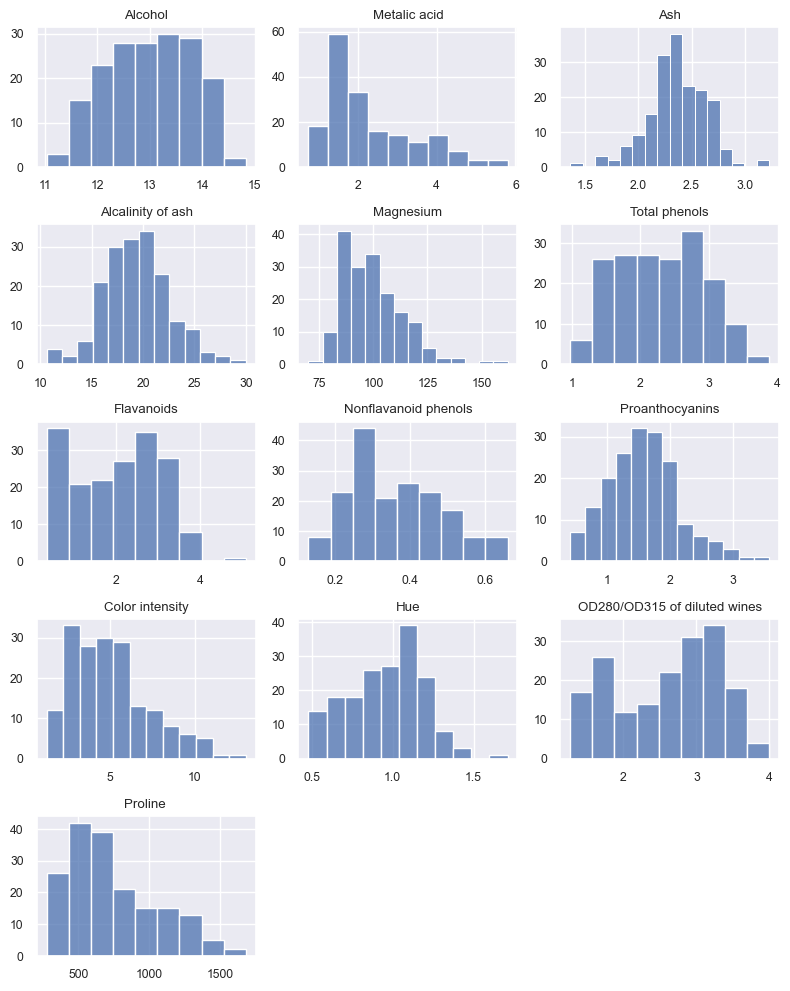

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(8, 10))

for i, ax in enumerate(fig.get_axes()):
    if i < 13:
        feature = wine.columns[1:][i]
        sns.histplot(wine[feature], ax=ax)
        ax.set_title(feature)
        ax.set_ylabel('')
        ax.set_xlabel('')
fig.delaxes(axs[(4, 2)])
fig.delaxes(axs[(4, 1)])
plt.tight_layout()
plt.show()

Vemos que no hay variables con distribuciones normales, así que nos dicidimos por el 'RobustScaler' en caso de que trasnformemos los datos más adelante.

Dado que su tamaño no es muy grande, renunciamos a la posibilidad de reducir el dataset y nos quedamos con todas las variables.

En primer lugar, definimos las variables independientes en 'X'/features y la dependiente en 'y'/target y hacemos nuestras dos primeras predicciones con los modelos 'Decision Tree Classifier' y con 'K Neighbors Classifier'.

In [13]:
X = wine.iloc[:, 1:]
y = wine.iloc[:, :1]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_dectree_simple = DecisionTreeClassifier(random_state=1).fit(X, y)
model_KNN_simple = KNeighborsClassifier().fit(X, y)

print('Decision Tree model simple score:', model_dectree_simple.score(X, y))
print('KNN model simple score:', model_KNN_simple.score(X, y))

Decision Tree model simple score: 1.0
KNN model simple score: 0.7865168539325843


Vemos que el modelo 'Decision Tree' consigue la máxima puntuación, por lo que este resultado no es confiable, ya que está 'overfitted'.

Podemos obtener más información sobre este resultado consultando su 'plot_tree' de la siguiente manera.

[Text(0.5657894736842105, 0.9166666666666666, 'OD280/OD315 of diluted wines <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]\nclass = Class 02'),
 Text(0.34210526315789475, 0.75, 'Hue <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]\nclass = Class 02'),
 Text(0.21052631578947367, 0.5833333333333334, 'Color intensity <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]\nclass = Class 03'),
 Text(0.10526315789473684, 0.4166666666666667, 'Total phenols <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = Class 03'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = Class 03'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Class 02'),
 Text(0.3157894736842105, 0.4166666666666667, 'Alcohol <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]\nclass = Class 02'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = Class 02'),
 Text(0.3684210526

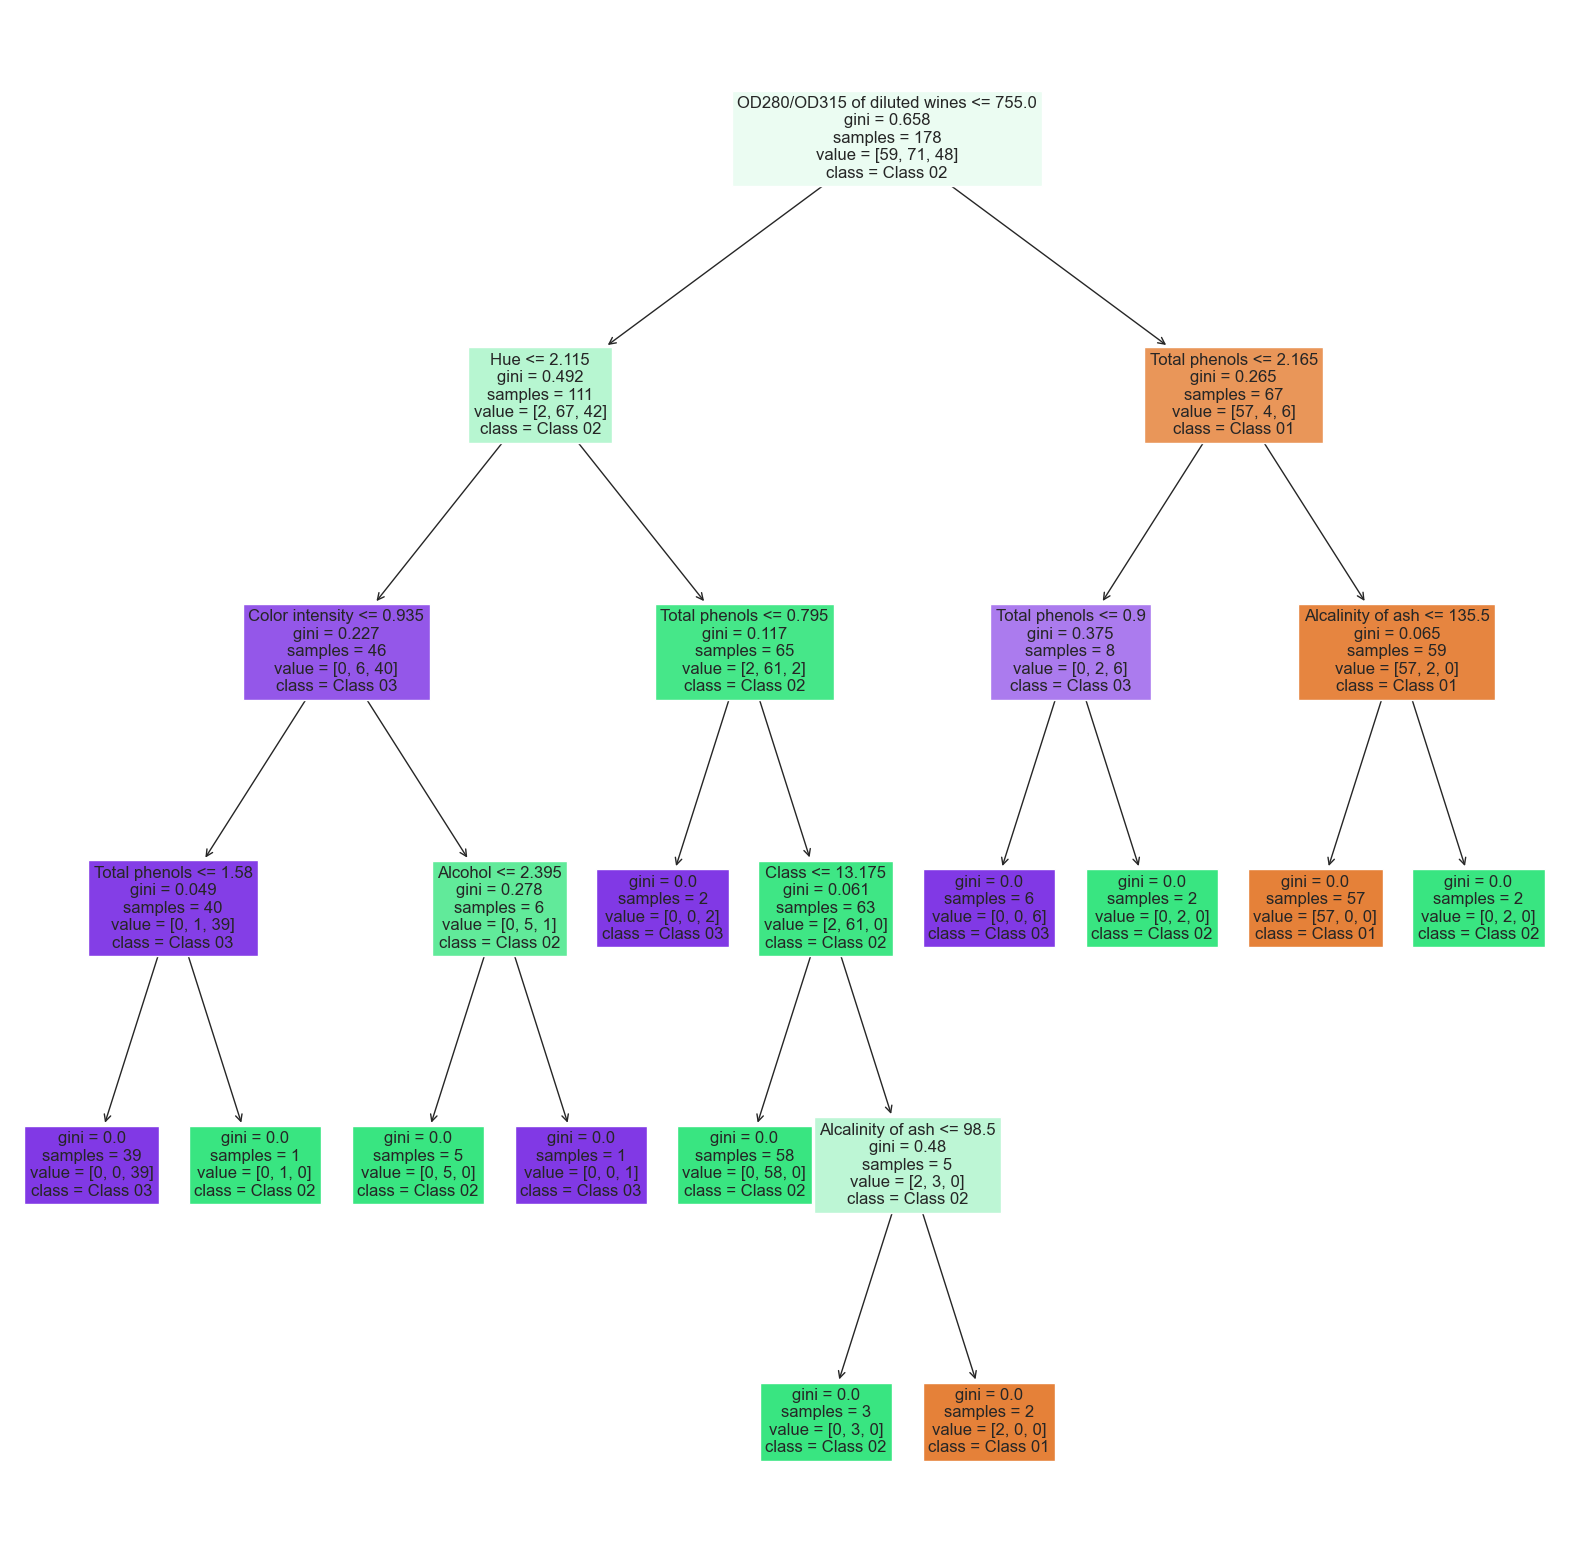

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model_dectree_simple,
          filled=True,
          class_names=['Class 01', 'Class 02', 'Class 03'],
          feature_names=wine.columns,
          fontsize=12)

Comprobamos que se trata de un árbol grande y ramificado, algo que también nos puede hacer sospechar de estar 'overfitted'. Esto se debe a que utilizamos todo el dataset para entrenar el modelo y no hemos dejado observaciones desconocidas para ponerlo a prueba con registros desconocidos, así que más adelante volveremos a ello, ya sea aplicando un modelo de validación como el train/test o el cross validation.

Para acabar con esta primera aproximación al dataset, continuamos y hacemos una predicción para acto seguido consultar los resultados en una matriz de confusión.

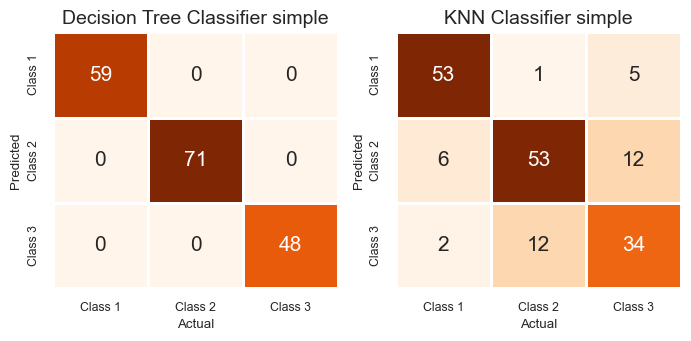

In [19]:
from sklearn.metrics import confusion_matrix

Y_dectree_simple_pred = model_dectree_simple.predict(X)
Y_KNN_simple_pred = model_KNN_simple.predict(X)

cm_dectree_simple = confusion_matrix(y, Y_dectree_simple_pred)
cm_KNN_simple = confusion_matrix(y, Y_KNN_simple_pred)

fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

for i, ax in enumerate(fig.get_axes()):
        feature = [cm_dectree_simple, cm_KNN_simple][i]
        titles = ['Decision Tree Classifier simple', 'KNN Classifier simple'][i]
        sns.heatmap(feature, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['Class 1','Class 2', 'Class 3'], yticklabels=['Class 1','Class 2', 'Class 3'], ax=ax)
        ax.set_title(titles, fontsize = 14)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
plt.tight_layout()
plt.show()

Estas matrices de confusión nos indican los resultados predichos para ambos modelos y si hay coincidencia negativa o positiva con los resultados actuales.

En el gráfico los valores que trazan una diagonal son los valores predichos que coinciden con los valores actuales, por lo que son predicciones correctas. Sin embargo, el resto de valores se tratan de las predicciones erróneas.

Porqué con la misma información para ambos modelos llevan a resultados tan distintos, entiendo que se debe a que ambos funcionan de diferente manera.

Para acabar de hacernos una idea sobre los resultados de ambos modelos, podemos compararlos con métricas de clasificación como la exactitud, la precisión, la especificdad, el Recall o la puntuación F1. Para ello usaremos la herramienta 'classification_report' e iremos comentando cada una de ellas.

En primer lugar consultamos la exactitud, la cual nos indica el número de valores correctamente clasificados en comparación con la totalidad de los registros.

In [20]:
from sklearn.metrics import classification_report

report_simple_dectree = classification_report(y, Y_dectree_simple_pred, digits=3, output_dict = True)
report_simple_KNN = classification_report(y, Y_KNN_simple_pred, digits=3, output_dict = True)

print('Decision Tree simple Accuracy = {0:0.3f}'.format(report_simple_dectree["accuracy"]))
print('KNN simple Accuracy = {0:0.3f}'.format(report_simple_KNN["accuracy"]))

Decision Tree simple Accuracy = 1.000
KNN simple Accuracy = 0.787


Acto seguido, consultamos la precisión de los modelos. Esta métrica indica el porcentaje de valores que se han clasificado como positivos son realmente positivos.

In [21]:
print('Decision Tree simple Precision = {0:0.3f}'.format(report_simple_dectree["1"]["precision"]))
print('KNN simple Precision = {0:0.3f}'.format(report_simple_KNN["1"]["precision"]))

Decision Tree simple Precision = 1.000
KNN simple Precision = 0.869


Por otro lado, se encuentra la métrica de recall, que se utiliza para saber cuantos valores positivos son correctamente clasificados.

In [22]:
print('Decision Tree simple Recall = {0:0.3f}'.format(report_simple_dectree["1"]["recall"]))
print('KNN simple Recall = {0:0.3f}'.format(report_simple_KNN["1"]["recall"]))

Decision Tree simple Recall = 1.000
KNN simple Recall = 0.898


Por último, también disponemos de la métrica F1-Score, que combina Precision y Recall para obtener un valor mucho más objetivo.

In [23]:
print('Decision Tree simple F1-score = {0:0.3f}'.format(report_simple_dectree["1"]["f1-score"]))
print('KNN simple F1-score = {0:0.3f}'.format(report_simple_KNN["1"]["f1-score"]))

Decision Tree simple F1-score = 1.000
KNN simple F1-score = 0.883


Dado que no hay margen de mejora para el modelo Decision Tree Classifier, aplicamos tan solo un ajuste de los hiperparámetros para el modelo de clasificación KNN, por lo que consultamos en primer lugar sus hiperperámetros con 'get_aparams()'.

In [25]:
model_KNN_simple.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Comprobamos que este modelo no dispone de muchos hiperparámetros para ajustar la predicción. Sin embargo, entre los principales nos encontramos con 'n_neighbors', el cual nos permite introducir el número de vecinos a tener en cuenta para hacer la predicción del nuevo registro/observación.

Por otro lado, está 'weights', que en caso de estar en 'uniform' toma el número de registros vecinos indicado por 'n_neighbors' y se decide por la clase con mayor número de registros. En cambio, en caso de encontrarse en 'distance', lo que tomará en cuenta para decidirse es una menor distancia con sus vecinos.

Por último, los hiperparámetros 'p' y 'metric' se refieren a cómo se mide esta distancia entre las diferentes observaciones.

Procedemos con GridSearchCV() para obtener los mejores hiperparámetros al indicarle a esta herramienta una serie de opciones y rangos para calcular la mejor combinación y así aumentar la capacidad predictiva de nuestro modelo.

In [26]:
from sklearn.model_selection import GridSearchCV

grid_KNN_simple = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'metric': ['euclidean', 'minkowski', 'manhattan'],
                   'n_neighbors': range(1,30),
                   'p': [1, 2, 3],
                   'weights': ['uniform', 'distance']}

cv_KNN_simple = GridSearchCV(KNeighborsClassifier(), grid_KNN_simple)
model_KNN_simple_grid = cv_KNN_simple.fit(X, y)

print("KNN simple Hyperparameters:", cv_KNN_simple.best_params_)
print("KNN simple Score:", model_KNN_simple_grid.best_score_)

KNN simple Hyperparameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
KNN simple Score: 0.8093650793650793


Parece ser que el modelo admite mejora al ajustarlo con los hiperparámetros. Sin embargo, al observarlos nos encontramos que el valor óptimo para 'n_neighbors' es '1', por lo que resulta dudoso, ya que tan solo un valor vecino no debería ser capaz de decidir la predicción.

Como comentábamos más arriba, posiblemente el hecho de que no hayamos utilizado ningún modelo de validación como el train/test nos haya llevado a este punto en el que no podemos avanzar más, así que procedemos ahora a aplicarlo.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model_dectree_splitted = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
model_KNN_splitted = KNeighborsClassifier().fit(X_train, y_train)

A continuación hacemos una predicción, consultamos la matriz de confusión y la exactitud de la puntuación para ambos modelos.

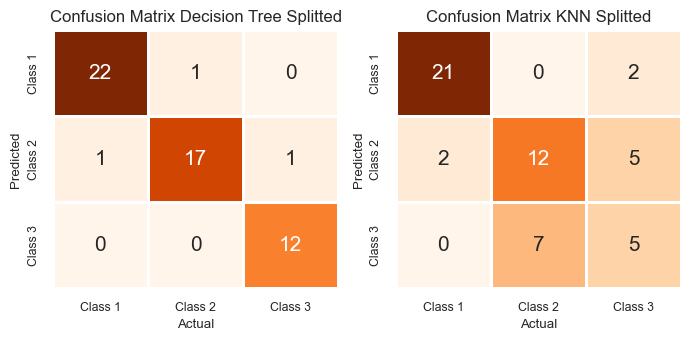

In [29]:
Y_dectree_splitted_pred = model_dectree_splitted.predict(X_test)
Y_KNN_splitted_pred = model_KNN_splitted.predict(X_test)

cm_dectree_splitted = confusion_matrix(y_test, Y_dectree_splitted_pred)
cm_KNN_splitted = confusion_matrix(y_test, Y_KNN_splitted_pred)

fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

for i, ax in enumerate(fig.get_axes()):
        feature = [cm_dectree_splitted, cm_KNN_splitted][i]
        titles = ['Confusion Matrix Decision Tree Splitted', 'Confusion Matrix KNN Splitted'][i]
        sns.heatmap(feature, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['Class 1','Class 2', 'Class 3'], yticklabels=['Class 1','Class 2', 'Class 3'], ax=ax)
        ax.set_title(titles, fontsize = 12)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
plt.tight_layout()
plt.show()

In [33]:
print('Decision Tree model splitted score:', model_dectree_splitted.score(X_test, y_test))
print('KNN model splitted score:', model_KNN_splitted.score(X_test, y_test))

Decision Tree model splitted score: 0.9444444444444444
KNN model splitted score: 0.7037037037037037


Los resultados son similares a los anteriores, pero con la diferencia de que el modelo 'Desicion Tree' permite un margen de mejora a pesar de que se desarrolla claramente mejor que el 'KNN Classifier'.

Por lo tanto, tal y como hicimos anteriormente, consultamos en primer lugar los hiperparámetros que admite el modelo 'Decision Tree Classifier', obtenemos su mejor combinación y hacemos una predicción, para así mejorar todavía más su desempeño.

In [31]:
model_dectree_splitted.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

En el caso del 'Decision Tree Classifier' disponemos de más hiperparámetros que en el modelo 'KNN'.

Tenemos 'criterion', que clacula la cantidad de impuridad ('gini'), entropia ('entropy') o pérdida (log_loss), que en caso de ser 0 implica necesariamente el final de una ramificación en un leaf node, pues no habría nada más que depurar.

Por otro lado, hay varios hiperparámetros que parecen estar diseñados para evitar que el modelo esté 'overfitted', como 'max_depth' o 'max_leaf_nodes', que limitan el número de ramificaciones y de leafs respectivamente al asignarles un valor máximo. También nos encontramos con 'min_samples_leaf', 'min_samples_leaf', 'min_samples_split' o 'min_weight_fraction_leaf' que también asignan un valor límite, pero en este caso se trata de un valor mínimo.

Por último, para no obtener predicciones distintas con cada cálculo de los mejores hiperparámetros, es necesario que también incluyamos el hiperparámetro 'random_state' y que coincida con el mismo valor asignado en la separación train/test realizada más arriba.

In [34]:
grid_dectree_splitted = {'criterion': ['gini','entropy','log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'splitter': ['best', 'random'],
                         'random_state': [1]}

cv_dectree_splitted = GridSearchCV(DecisionTreeClassifier(), grid_dectree_splitted)
model_dectree_splitted_grid = cv_dectree_splitted.fit(X_train, y_train)

print("Decision Tree model splitted best hyperparameters:", cv_dectree_splitted.best_params_)

Decision Tree model splitted best hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'random_state': 1, 'splitter': 'best'}


Una vez hemos obtenido los mejores hiperparámetros, procedemos a entrenar un modelo con ellos, para así realizar una predicción.

In [35]:
model_dectree_splitted_params = DecisionTreeClassifier(criterion = 'entropy',
                                       max_depth = 4,
                                       max_features = 'auto',
                                       max_leaf_nodes = 7,
                                       min_samples_leaf = 1, 
                                       splitter = 'best',
                                       random_state=1).fit(X_train, y_train)

Y_dectree_splitted_params_pred = model_dectree_splitted_params.predict(X_test)

print('Decision Tree model splitted params test score:', model_dectree_splitted_params.score(X_test, y_test))

Decision Tree model splitted params test score: 0.9259259259259259


Vemos que el modelo Decision Tree al modificar sus hiperparámetros se desempeña peor, por lo que es posible que el modelo de validación train/test no sea del todo representativo.

Por lo tanto, para poder continuar tenemos que probar con otro método de validación, como por ejemplo el 'Cross Validation' y así tratar que el modelo nos proporcione información más precisa.

In [41]:
from sklearn.model_selection import cross_val_score

model_dectree_cross_val_score = cross_val_score(DecisionTreeClassifier(random_state = 1), X, y, cv=10)

model_dectree_cross_val_score

array([0.83333333, 0.88888889, 0.66666667, 0.88888889, 0.83333333,
       0.88888889, 1.        , 0.94444444, 0.94117647, 0.76470588])

Vemos que el dataset fluctúa demasiado, pues su peor desempeño es de '0.7647' y el mejor es de '1'. Este exceso de variabilidad, como comentabámos más arriba, entiendo que se debe a que las 3 clases no tienen el mismo peso, por lo que es probable que no hayan estado representadas en la misma proporción en cada uno de los 'folds' del 'Cross Validation'.

El siguiente paso que tendríamos que dar es que todos los 'folds' sean representativos de todas las clases, como por ejemplo con el 'Stratified K Fold'.

Sin embargo, en lo que queda de ejercicio continuaremos con la media de los resultados obtenidos con el 'Cross Validation'.

In [42]:
print('Decision Tree model cross val score:', model_dectree_cross_val_score.mean())

Decision Tree model cross val score: 0.865032679738562


Ahora aplicamos un ajuste de los hiperparámetros y consultamos su puntuación para comprobar si podemos mejorar la predicción.

In [43]:
from sklearn.model_selection import cross_val_score

model_dectree_cross_val_params_score = cross_val_score(DecisionTreeClassifier(criterion = 'entropy',
                                       max_depth = 4,
                                       max_features = 'auto',
                                       max_leaf_nodes = 7,
                                       min_samples_leaf = 1, 
                                       splitter = 'best',
                                       random_state = 1), X, y, cv=10)

model_dectree_cross_val_params_score

array([0.83333333, 1.        , 0.83333333, 1.        , 0.88888889,
       0.94444444, 0.94444444, 0.94444444, 1.        , 0.76470588])

In [46]:
print('Decision Tree model params cross validation mean score:', model_dectree_cross_val_params_score.mean())

Decision Tree model params cross validation mean score: 0.9153594771241831


Ahora ya nos encontramos con una progresión normal, por lo que disponemos de información coherente en base a los presupuestos que hemos ido estableciendo.

Continuamos y hacemos una predicción para calcular su matriz de confusión y comparar su exactitud con la puntuación acabada de obtener.

In [47]:
from sklearn.model_selection import cross_val_predict

Y_dectree_cross_val_params_pred = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                           max_depth = 4,
                                           max_features = 'auto',
                                           max_leaf_nodes = 7,
                                           min_samples_leaf = 1, 
                                           splitter = 'best',
                                           random_state = 1), X, y, cv=10)

cm_dectree_cross_val_params = confusion_matrix(y, Y_dectree_cross_val_params_pred)

Text(0.5, 1.0, 'Conf Mat Dec Tree cross val params')

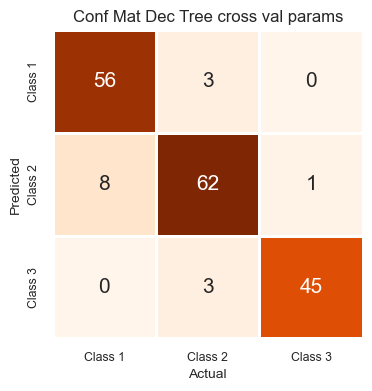

In [48]:
plt.figure(figsize=(4, 4))

sns.heatmap(cm_dectree_cross_val_params, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['Class 1','Class 2', 'Class 3'], yticklabels=['Class 1','Class 2', 'Class 3'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Conf Mat Dec Tree cross val params", fontsize=12)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y, Y_dectree_cross_val_params_pred)

0.9157303370786517

Vemos que la puntuación 'score' y la exactitud son las mismas, por lo que hemos podiddo conseguir una predicción mediante el sistema de validación 'cross validation' para el modelo 'Decision Tree Classifier'.

Por lo tanto, pasamos ahora a nuestro otro modelo y volvemos a aplicar el mismo rango de hiperparámetros para el modelo KNN, pero esta vez tan solo para la parte train del dataset dividido y así realizar una predicción para la parte test.

In [50]:
grid_KNN_splitted = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'metric': ['euclidean', 'minkowski', 'manhattan'],
                   'n_neighbors': range(1,30),
                   'p': [1, 2, 3],
                   'weights': ['uniform', 'distance']}

cv_KNN_splitted = GridSearchCV(KNeighborsClassifier(), grid_KNN_splitted)
model_KNN_splitted_grid = cv_KNN_splitted.fit(X_train, y_train)

print("KNN model splitted best hyperparameters:", cv_KNN_splitted.best_params_)

KNN model splitted best hyperparameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 16, 'p': 1, 'weights': 'distance'}


In [51]:
model_KNN_splitted_params = KNeighborsClassifier(algorithm = 'auto',
                            metric = 'minkowski',
                            n_neighbors = 16,
                            p = 1,
                            weights = 'distance').fit(X_train, y_train)

Y_KNN_splitted_params_pred = model_KNN_splitted_params.predict(X_test)

Entrenamos el model KNN para hacer una predicción y consultamos su matriz de confusión y exactitud.

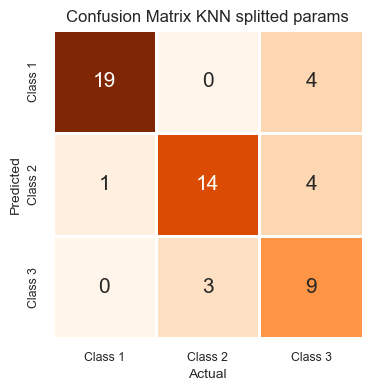

In [52]:
cm_KNN_splitted_params = confusion_matrix(y_test, Y_KNN_splitted_params_pred)

plt.figure(figsize=(4, 4))

sns.heatmap(cm_KNN_splitted_params, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['Class 1','Class 2', 'Class 3'], yticklabels=['Class 1','Class 2', 'Class 3'])
plt.ylabel("Predicted", fontsize=10)
plt.xlabel("Actual", fontsize=10)
plt.title("Confusion Matrix KNN splitted params", fontsize=12)

plt.show()

In [53]:
print('KNN model splitted params test score:', model_KNN_splitted_params.score(X_test, y_test))

KNN model splitted params test score: 0.7777777777777778


Podemos observar que la predicción ha mejorado, pero antes de proceder y comprobar si todavía es mejorable este resultado al aplicar alguna transformación de los datos, como por ejemplo la estandarización, también me gustaría aplicar al modelo KNN el sistema de validación 'cross validation' y obtener su puntuación.

In [56]:
model_KNN_cross_val_score = cross_val_score(KNeighborsClassifier(), X, y, cv=10)

model_KNN_cross_val_score

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [57]:
print('KNN model cross validation score:', model_KNN_cross_val_score.mean())

KNN model cross validation score: 0.6754901960784313


Añadimos ahora al 'cross validation' los hiperparámetros. Para ello, los volvemos a utilizar los que calculamos previamente.

In [58]:
model_KNN_cross_val_params_score = cross_val_score(KNeighborsClassifier(algorithm = 'auto',
                                   metric = 'minkowski',
                                   n_neighbors = 16,
                                   p = 1,
                                   weights = 'distance'), X, y, cv=10)

model_KNN_cross_val_params_score

array([0.77777778, 0.77777778, 0.77777778, 0.72222222, 0.66666667,
       0.66666667, 1.        , 0.83333333, 0.82352941, 0.82352941])

In [59]:
print('KNN model params cross validation mean score:', model_KNN_cross_val_params_score.mean())

KNN model params cross validation mean score: 0.7869281045751634


A pesar de que la diferencia sea muy pequeña, sabemos que la validación mediante 'cross validation' tiene más valor, pues las 3 clases no están representadas en la misma proporción.

Continuamos con el 'cross validation' y, tal y como comentábamos al principio, debido a la distribución de los datos y la presencia de 'outliers', nos inclinamos por el 'Robust Scaler'.

Una vez transformado, aplicamos el 'cross validation' y ajustamos los parámetros para calcular su puntuación.

In [63]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

model_KNN_params_cross_val_scaled_score = cross_val_score(KNeighborsClassifier(algorithm = 'auto',
                                   metric = 'minkowski',
                                   n_neighbors = 16,
                                   p = 1,
                                   weights = 'distance'), X_scaled, y, cv=10)

model_KNN_params_cross_val_scaled_score

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 0.94117647, 1.        ])

In [74]:
print('KNN model params cross validation mean scaled score:', model_KNN_params_cross_val_scaled_score.mean())

KNN model params cross validation mean scaled score: 0.9718954248366012


Obtenemos finalmente un modelo KNN en cierto grado representativo que serviría para clasificar registros nuevos.

Ahora también estamos en posición de explicar porqué es tan determinante la esclación de los datos para un modelo de clasificación como el KNN. Esto se debe a que este modelo se basa en la distancia de las observaciones, por lo que al ponerlas todas a una misma proporción hace que el modelo mejore de manera sustancial.

Dado que hasta ahora ha sido más bien el model 'Decision Tree' el que se ha desenvuelto mejor, repetimos este mismo proceso que acabamos de realziar con el KNN.

In [65]:
model_dectree_params_cross_val_scaled_score = cross_val_score(DecisionTreeClassifier(criterion = 'entropy',
                                              max_depth = 4,
                                              max_features = 'auto',
                                              max_leaf_nodes = 6,
                                              min_samples_leaf = 1, 
                                              splitter = 'best',
                                              random_state = 1), X_scaled, y, cv=10)

model_dectree_params_cross_val_scaled_score

array([0.83333333, 1.        , 0.83333333, 1.        , 0.88888889,
       0.94444444, 1.        , 0.94444444, 1.        , 1.        ])

In [73]:
print('Decision Tree model params cross validation mean scaled score:', model_dectree_params_cross_val_scaled_score.mean())

Decision Tree model params cross validation mean scaled score: 0.9444444444444444


Si bien obtenemos una mejora, esta no es muy grande y el modelo KNN se demuestra como el mejor de los dos. También podemos deducir de ello, que la estandarización en los modelos tipo árbol de decisión no son tan determinantes.

Comparamos finalmente su desempeño con sus matrices de confusión.

In [69]:
Y_dectree_cross_val_params_scaled_pred = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                           max_depth = 4,
                                           max_features = 'auto',
                                           max_leaf_nodes = 7,
                                           min_samples_leaf = 1, 
                                           splitter = 'best',
                                           random_state = 1), X_scaled, y, cv=10)

cm_dectree_cross_val_params_scaled = confusion_matrix(y, Y_dectree_cross_val_params_scaled_pred)

Y_KNN_cross_val_params_scaled = cross_val_predict(KNeighborsClassifier(algorithm = 'auto',
                                metric = 'minkowski',
                                n_neighbors = 8,
                                p = 1,
                                weights = 'distance'), X_scaled, y, cv=10)

cm_KNN_cross_val_params_scaled = confusion_matrix(y, Y_KNN_cross_val_params_scaled)

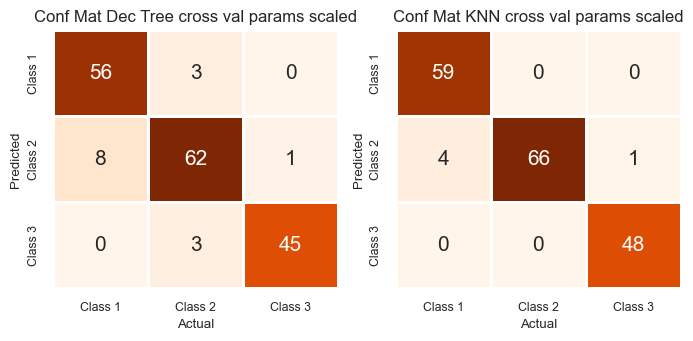

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

for i, ax in enumerate(fig.get_axes()):
        feature = [cm_dectree_cross_val_params_scaled, cm_KNN_cross_val_params_scaled][i]
        titles = ['Conf Mat Dec Tree cross val params scaled', 'Conf Mat KNN cross val params scaled'][i]
        sns.heatmap(feature, annot=True, annot_kws={"size": 15}, cmap="Oranges", fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=['Class 1','Class 2', 'Class 3'], yticklabels=['Class 1','Class 2', 'Class 3'], ax=ax)
        ax.set_title(titles, fontsize = 12)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
plt.tight_layout()
plt.show()

Resumimos de nuevo los resultados que hemos ido obteniendo a lo largo del ejercicio.

In [76]:
print('Decision Tree model simple score:', model_dectree_simple.score(X, y))
print('Decision Tree model splitted score:', model_dectree_splitted.score(X_test, y_test))
print('Decision Tree model splitted params test score:', model_dectree_splitted_params.score(X_test, y_test))
print('Decision Tree model cross val score:', model_dectree_cross_val_score.mean())
print('Decision Tree model params cross validation mean score:', model_dectree_cross_val_params_score.mean())
print('Decision Tree model params cross validation mean scaled score:', model_dectree_params_cross_val_scaled_score.mean())

Decision Tree model simple score: 1.0
Decision Tree model splitted score: 0.9444444444444444
Decision Tree model splitted params test score: 0.9259259259259259
Decision Tree model cross val score: 0.865032679738562
Decision Tree model params cross validation mean score: 0.9153594771241831
Decision Tree model params cross validation mean scaled score: 0.9444444444444444


In [77]:
print('KNN model simple score:', model_KNN_simple.score(X, y))
print('KNN model splitted score:', model_KNN_splitted.score(X_test, y_test))
print('KNN model splitted params test score:', model_KNN_splitted_params.score(X_test, y_test))
print('KNN model cross validation score:', model_KNN_cross_val_score.mean())
print('KNN model params cross validation mean score:', model_KNN_cross_val_params_score.mean())
print('KNN model params cross validation mean scaled score:', model_KNN_params_cross_val_scaled_score.mean())

KNN model simple score: 0.7865168539325843
KNN model splitted score: 0.7037037037037037
KNN model splitted params test score: 0.7777777777777778
KNN model cross validation score: 0.6754901960784313
KNN model params cross validation mean score: 0.7869281045751634
KNN model params cross validation mean scaled score: 0.9718954248366012


En este resumen podemos ver en los primeros resultados que es necesario dejar registros desconocidos, y así poner a prueba de manera correcta el modelo entrenado.

Por otro lado, vemos que también es muy importante que los datos con los que entrenamos el modelo sean los más representativos posibles y proporcionados. Además, debido a ésto, el modelo 'cross validation' se ha mostrado superior al 'train/test', pues a pesar de que no hemos controlado que las 3 clases estén proporcionalmente representadas en cada 'fold', al calcular la media el desempeño para ambos modelos bajo drásticamente. Queda pendiente en nuestro trabajo profundizar en una mayor representatividad de los datos, como por ejemplo con el 'Stratified K Fold'.

Por último, los hiperparámetros se han mostrado determinantes en última instancia para que el modelo 'KNN' se desempeñara mejor el 'Decision Tree'.